In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [9]:
try:
    df = pd.read_csv('../data/external/MachineLearningRating_v3.txt',sep='|')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: Ensure your data file is in the correct path.")
df.head()

/tmp/ipykernel_103308/2059471405.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/external/MachineLearningRating_v3.txt',sep='|')


Data loaded successfully.


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [11]:
print("\n--- Data Structure ---")
print(df.info())

# Transaction date is in datetime format
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
print("\n'TransactionMonth' converted to datetime.")


--- Data Structure ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   UnderwrittenCoverID       1000098 non-null  int64         
 1   PolicyID                  1000098 non-null  int64         
 2   TransactionMonth          1000098 non-null  datetime64[ns]
 3   IsVATRegistered           1000098 non-null  bool          
 4   Citizenship               1000098 non-null  object        
 5   LegalType                 1000098 non-null  object        
 6   Title                     1000098 non-null  object        
 7   Language                  1000098 non-null  object        
 8   Bank                      854137 non-null   object        
 9   AccountType               959866 non-null   object        
 10  MaritalStatus             991839 non-null   object        
 11  Gender                    

In [ ]:
numerical_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 
                  'kilowatts', 'cubiccapacity', 'SumInsured']

print("\n--- Descriptive Statistics (Numerical Features) ---")
# Use .T (transpose) for better readability
print(df[numerical_cols].describe().T.to_markdown(numalign="left", stralign="left"))


# Data Quality Assessment (Missing Values) 
print("\n--- Missing Value Check ---")
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data[missing_data > 0],
    'Missing Percentage': missing_percentage.round(2)
}).sort_values(by='Missing Percentage', ascending=False)

if missing_df.empty:
    print("No missing values found.")
else:
    print(missing_df.to_markdown(numalign="left", stralign="left"))


--- Descriptive Statistics (Numerical Features) ---
|                     | count      | mean    | std         | min      | 25%    | 50%     | 75%     | max         |
|:--------------------|:-----------|:--------|:------------|:---------|:-------|:--------|:--------|:------------|
| TotalPremium        | 1.0001e+06 | 61.9055 | 230.285     | -782.577 | 0      | 2.17833 | 21.9298 | 65282.6     |
| TotalClaims         | 1.0001e+06 | 64.8612 | 2384.07     | -12002.4 | 0      | 0       | 0       | 393092      |
| CustomValueEstimate | 220456     | 225531  | 564516      | 20000    | 135000 | 220000  | 280000  | 2.655e+07   |
| kilowatts           | 999546     | 97.2079 | 19.3933     | 0        | 75     | 111     | 111     | 309         |
| cubiccapacity       | 999546     | 2466.74 | 442.801     | 0        | 2237   | 2694    | 2694    | 12880       |
| SumInsured          | 1.0001e+06 | 604173  | 1.50833e+06 | 0.01     | 5000   | 7500    | 250000  | 1.26362e+07 |

--- Missing Value Check --

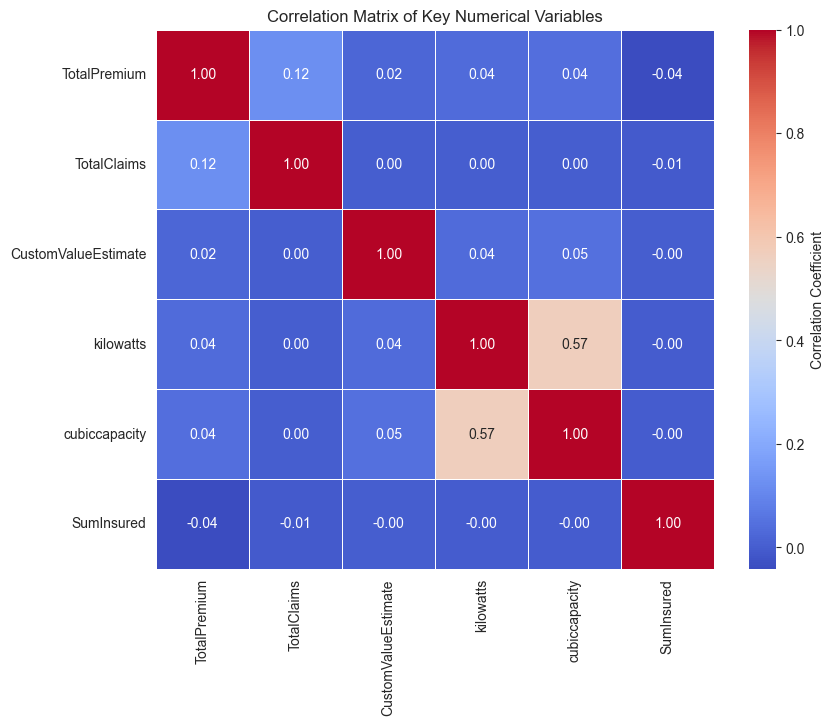

In [27]:
corr_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 
             'kilowatts', 'cubiccapacity', 'SumInsured'] 

correlation_matrix = df[corr_cols].corr()

plt.figure(figsize=(9, 7))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Matrix of Key Numerical Variables')
plt.show()


Overall Portfolio Loss Ratio: 1.0477

--- Loss Ratio by Province ---
| Province      | LossRatio   | PolicyCount   |
|:--------------|:------------|:--------------|
| Gauteng       | 1.22202     | 393865        |
| KwaZulu-Natal | 1.08269     | 169781        |
| Western Cape  | 1.05947     | 170796        |
| North West    | 0.790367    | 143287        |
| Mpumalanga    | 0.720897    | 52718         |
| Free State    | 0.680758    | 8099          |
| Limpopo       | 0.661199    | 24836         |
| Eastern Cape  | 0.633813    | 30336         |
| Northern Cape | 0.282699    | 6380          |

--- Loss Ratio by Gender ---
| Gender        | LossRatio   | PolicyCount   |
|:--------------|:------------|:--------------|
| Not specified | 1.05931     | 940990        |
| Male          | 0.88391     | 42817         |
| Female        | 0.821879    | 6755          |

--- Loss Ratio by VehicleType ---
| VehicleType       | LossRatio   | PolicyCount   |
|:------------------|:------------|:---------

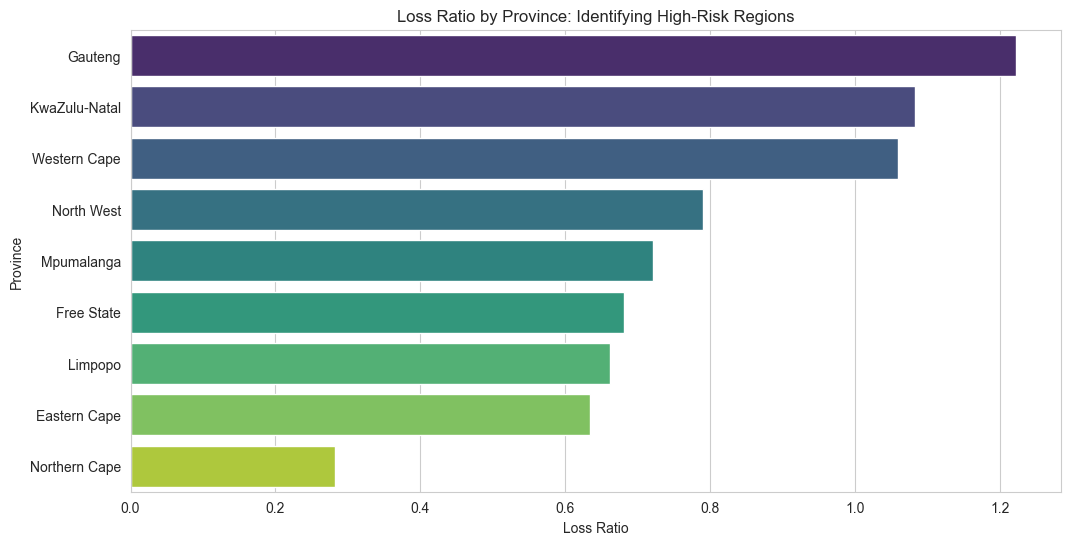

In [31]:
def calculate_loss_ratio_by_group(df, group_col):
    grouped = df.groupby(group_col)[['TotalClaims', 'TotalPremium', 'PolicyCount']].sum()
    grouped['LossRatio'] = grouped['TotalClaims'] / grouped['TotalPremium']
    grouped['ClaimFrequency'] = grouped['TotalClaims'].apply(lambda x: 1 if x > 0 else 0).sum() / grouped['PolicyCount'].sum()
    return grouped.sort_values(by='LossRatio', ascending=False)

# 1. Overall Portfolio Loss Ratio
overall_loss_ratio = df['TotalClaims'].sum() / df['TotalPremium'].sum()
print(f"\nOverall Portfolio Loss Ratio: {overall_loss_ratio:.4f}")


# 2. Loss Ratio by Province (High-Risk/Low-Risk Segment Identification)
loss_ratio_province = calculate_loss_ratio_by_group(df, 'Province')
print("\n--- Loss Ratio by Province ---")
print(loss_ratio_province[['LossRatio', 'PolicyCount']].to_markdown(numalign="left", stralign="left"))

# 3. Loss Ratio by Gender
loss_ratio_gender = calculate_loss_ratio_by_group(df, 'Gender')
print("\n--- Loss Ratio by Gender ---")
print(loss_ratio_gender[['LossRatio', 'PolicyCount']].to_markdown(numalign="left", stralign="left"))

# 4. Loss Ratio by Vehicle Type
loss_ratio_vehicletype = calculate_loss_ratio_by_group(df, 'VehicleType')
print("\n--- Loss Ratio by VehicleType ---")
print(loss_ratio_vehicletype[['LossRatio', 'PolicyCount']].head(10).to_markdown(numalign="left", stralign="left")) # Print top 10

# Plot Loss Ratio by Province
plt.figure(figsize=(12, 6))
plot_data_province = loss_ratio_province.reset_index()
sns.barplot(
    x='LossRatio',
    y='Province',
    data=plot_data_province,
    hue='Province',
    palette="viridis",
    legend=False
)
plt.title('Loss Ratio by Province: Identifying High-Risk Regions')
plt.xlabel('Loss Ratio')
plt.ylabel('Province')
plt.show()

/tmp/ipykernel_103308/2772963741.py:9: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(0, claim_limit)


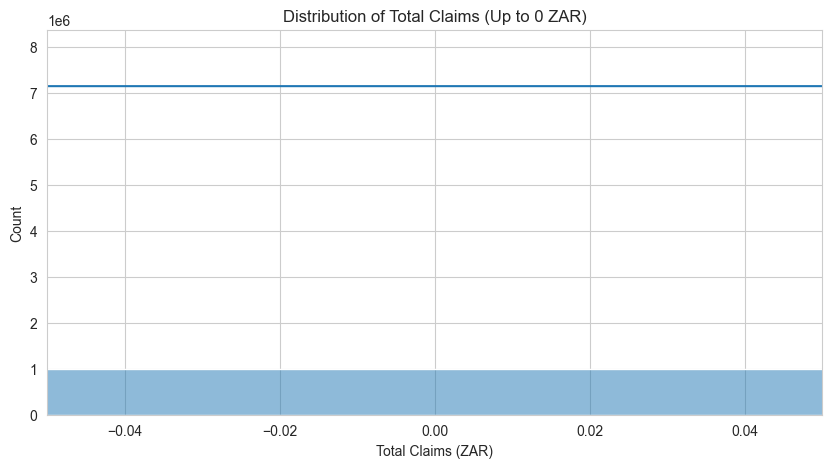

In [32]:
# --- Univariate Analysis (Distribution) ---
# Total Claims (Zoomed in to see distribution without extreme outliers)
plt.figure(figsize=(10, 5))
# Use log scale or limit x-axis to 99th percentile for a clearer view
claim_limit = df['TotalClaims'].quantile(0.99)
sns.histplot(df['TotalClaims'], bins=50, kde=True)
plt.title(f'Distribution of Total Claims (Up to {claim_limit:,.0f} ZAR)')
plt.xlabel('Total Claims (ZAR)')
plt.xlim(0, claim_limit)
plt.show()

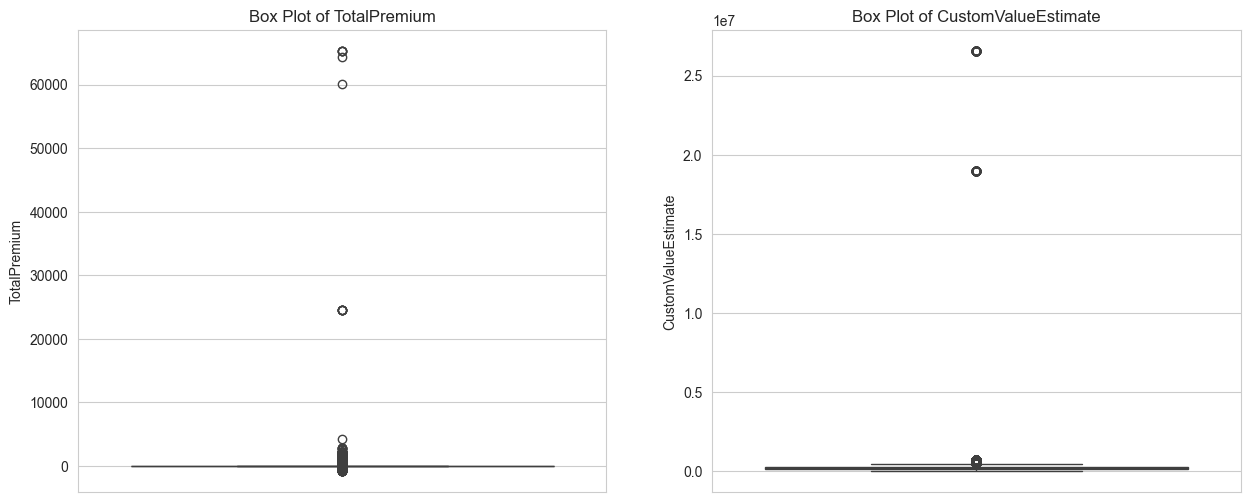

In [ ]:
## Outlier Detection (TotalPremium and CustomValueEstimate) 
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['TotalPremium'])
plt.title('Box Plot of TotalPremium')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['CustomValueEstimate'])
plt.title('Box Plot of CustomValueEstimate')
plt.show() 

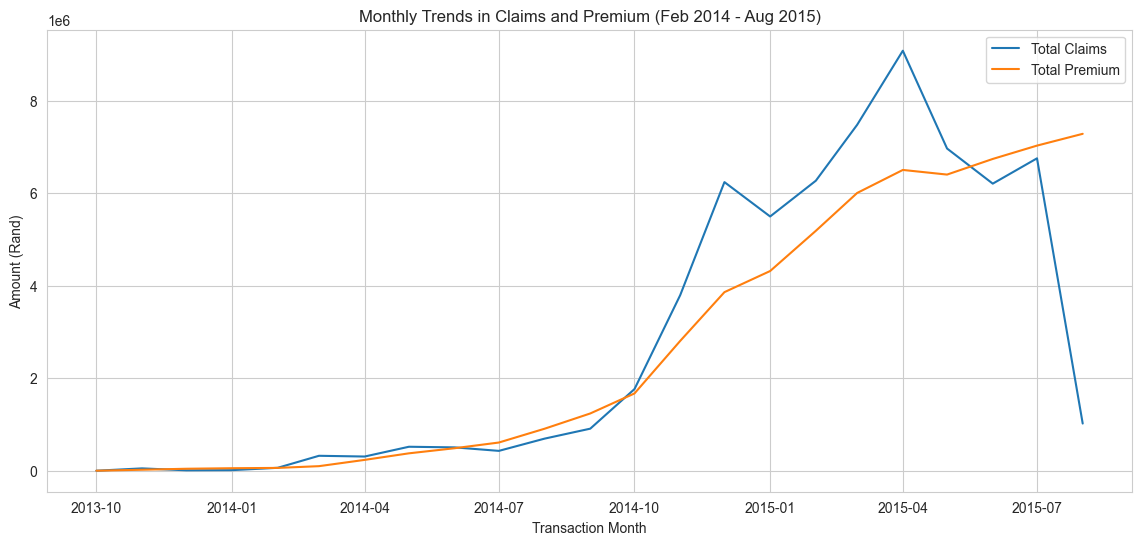

In [18]:
## Temporal Trends 
monthly_data = df.groupby('TransactionMonth')[['TotalClaims', 'TotalPremium']].sum()

plt.figure(figsize=(14, 6))
plt.plot(monthly_data.index, monthly_data['TotalClaims'], label='Total Claims')
plt.plot(monthly_data.index, monthly_data['TotalPremium'], label='Total Premium')
plt.title('Monthly Trends in Claims and Premium (Feb 2014 - Aug 2015)')
plt.xlabel('Transaction Month')
plt.ylabel('Amount (Rand)')
plt.legend()
plt.show()

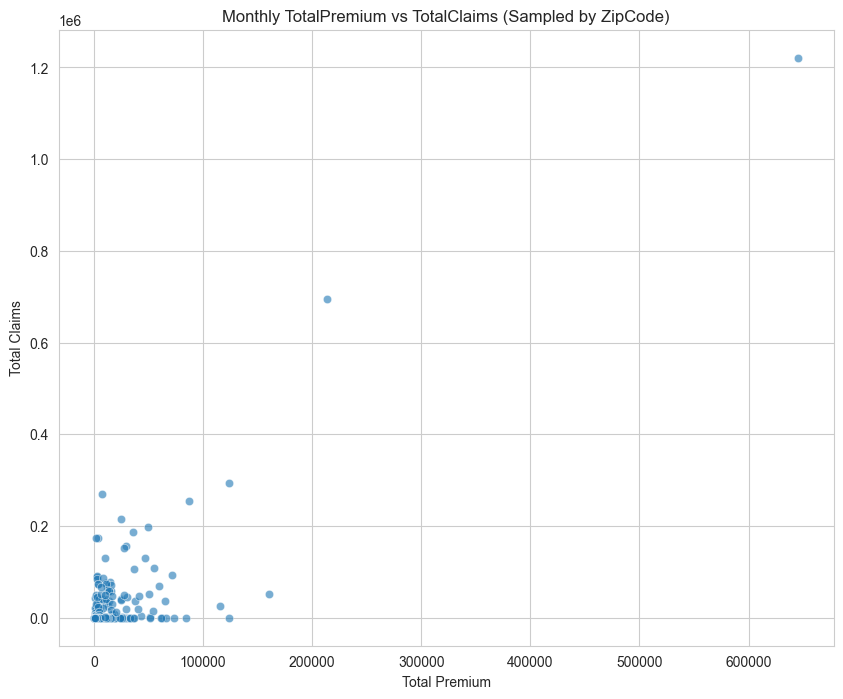

In [ ]:
## Bivariate Analysis (TotalPremium vs TotalClaims Correlation) 
# Create a scatter plot of monthly changes
monthly_zip_data = df.groupby(['TransactionMonth', 'PostalCode'])[['TotalPremium', 'TotalClaims']].sum().reset_index()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='TotalPremium', y='TotalClaims', data=monthly_zip_data.sample(n=1000, random_state=42), alpha=0.6)
plt.title('Monthly TotalPremium vs TotalClaims (Sampled by ZipCode)')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')
plt.show()

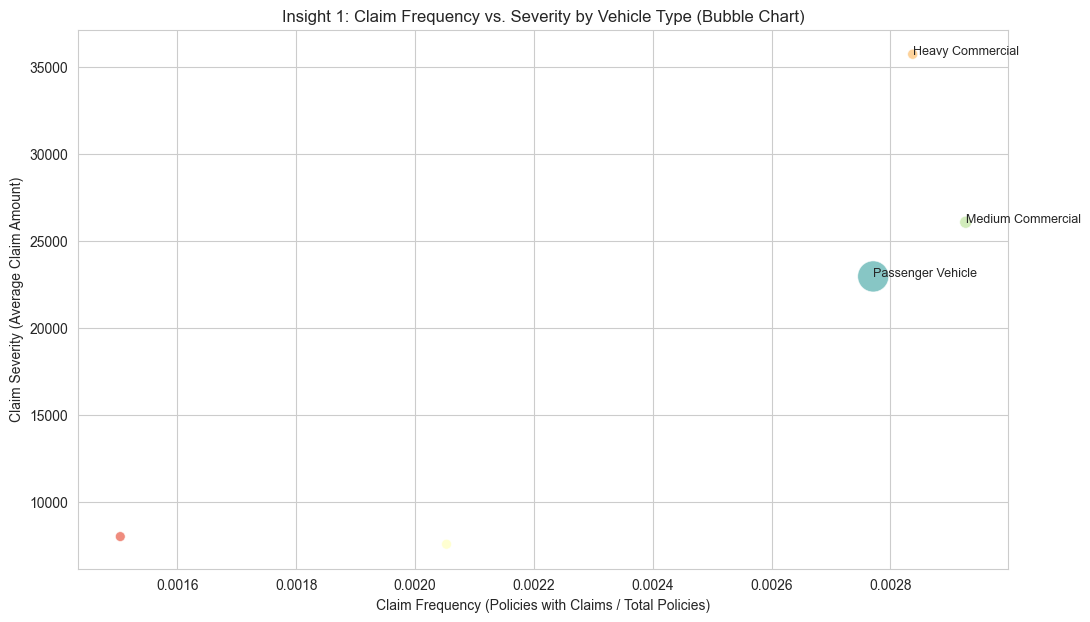

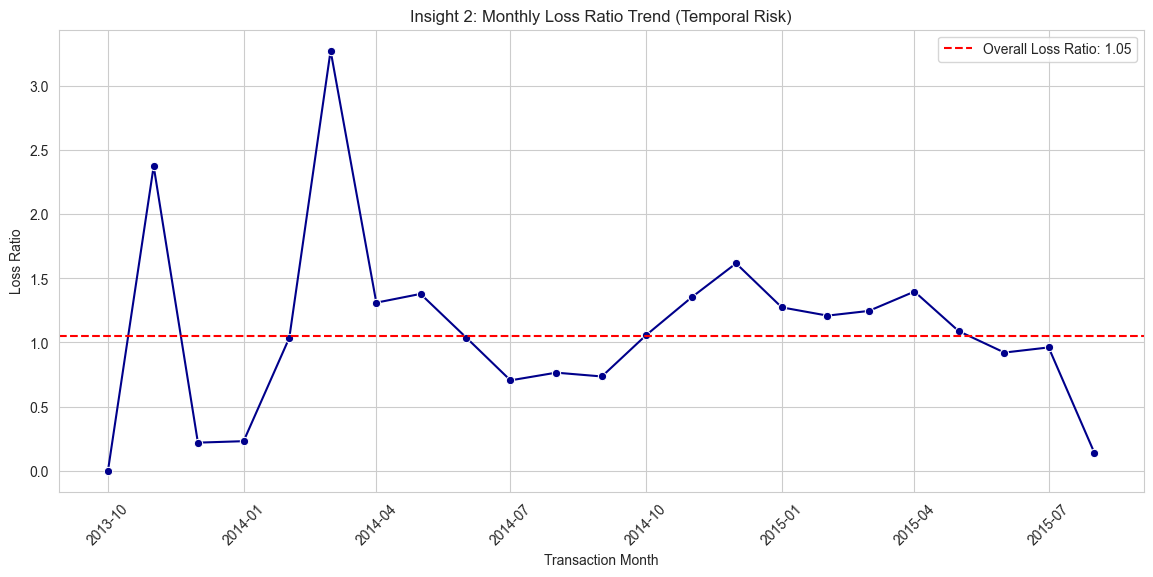

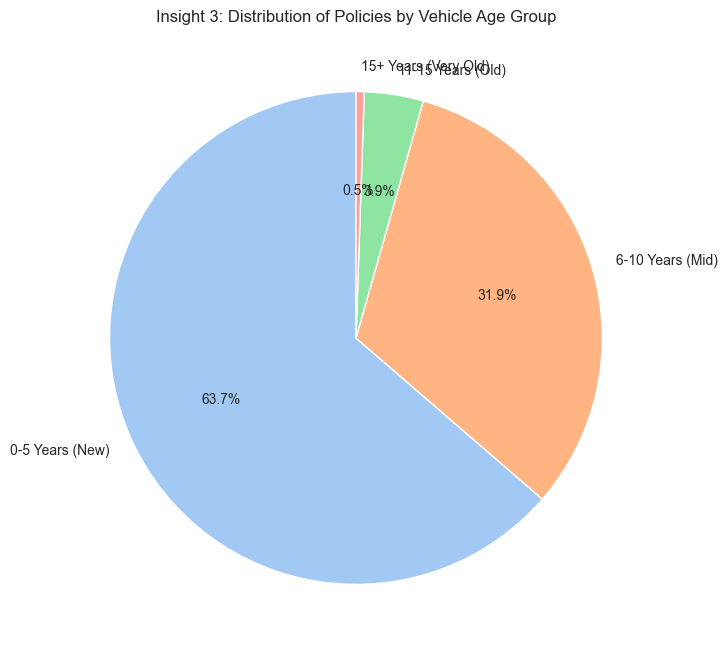

In [28]:
# Creative Plot 1: Claim Frequency vs. Claim Severity by Vehicle Type 
# Claim Frequency = Count of Claims (PolicyCount where Claim > 0) / Total Policies
# Claim Severity = Average Claim Amount (TotalClaims / Count of Claims where Claim > 0)

# Calculate Claim Frequency
claim_frequency_df = df.groupby('VehicleType')['TotalClaims'].agg(
    total_claims='sum',
    total_premium='sum',
    policies_with_claims=lambda x: (x > 0).sum(),
    total_policies='count'
).reset_index()

claim_frequency_df['ClaimFrequency'] = claim_frequency_df['policies_with_claims'] / claim_frequency_df['total_policies']
# Calculate Claim Severity (only for policies with claims)
claim_severity_df = df[df['TotalClaims'] > 0].groupby('VehicleType')['TotalClaims'].mean().reset_index(name='ClaimSeverity')

# Merge for plotting
risk_metrics_df = claim_frequency_df.merge(claim_severity_df, on='VehicleType', how='left').fillna(0)
risk_metrics_df = risk_metrics_df[risk_metrics_df['total_policies'] > 500] 

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=risk_metrics_df,
    x='ClaimFrequency',
    y='ClaimSeverity',
    size='total_policies',
    sizes=(50, 500),
    hue='VehicleType',
    palette='Spectral',
    legend=False,
    alpha=0.7
)
# Label top/bottom vehicle types for insight
for i in risk_metrics_df.sort_values('ClaimSeverity', ascending=False).head(3).index:
    plt.text(risk_metrics_df['ClaimFrequency'][i], risk_metrics_df['ClaimSeverity'][i], risk_metrics_df['VehicleType'][i], fontsize=9)
plt.title('Insight 1: Claim Frequency vs. Severity by Vehicle Type (Bubble Chart)')
plt.xlabel('Claim Frequency (Policies with Claims / Total Policies)')
plt.ylabel('Claim Severity (Average Claim Amount)')
plt.show()


# Creative Plot 2: Monthly Loss Ratio Trend 
# Helps identify seasonality and temporal risk trends
monthly_df = df.groupby('TransactionMonth')[['TotalClaims', 'TotalPremium']].sum().reset_index()
monthly_df['MonthlyLossRatio'] = monthly_df['TotalClaims'] / monthly_df['TotalPremium']

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=monthly_df,
    x='TransactionMonth',
    y='MonthlyLossRatio',
    marker='o',
    color='darkblue'
)
plt.axhline(overall_loss_ratio, color='red', linestyle='--', label=f'Overall Loss Ratio: {overall_loss_ratio:.2f}')
plt.title('Insight 2: Monthly Loss Ratio Trend (Temporal Risk)')
plt.xlabel('Transaction Month')
plt.ylabel('Loss Ratio')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Creative Plot 3: Vehicle Age Distribution vs. Policy Count (Risk Segmentation) 
# Helps understand if new vs. old vehicles dominate the portfolio
df['VehicleAge'] = df['TransactionMonth'].dt.year - df['RegistrationYear']
df['VehicleAgeGroup'] = pd.cut(
    df['VehicleAge'],
    bins=[-1, 5, 10, 15, np.inf],
    labels=['0-5 Years (New)', '6-10 Years (Mid)', '11-15 Years (Old)', '15+ Years (Very Old)'],
    right=True
)
age_group_counts = df['VehicleAgeGroup'].value_counts(normalize=True).sort_index()

plt.figure(figsize=(8, 8))
plt.pie(
    age_group_counts,
    labels=age_group_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel')
)
plt.title('Insight 3: Distribution of Policies by Vehicle Age Group')
plt.show()